# Milliken Moment Diagram Analysis

Importing necessary libraries

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../..")
sys.path.append("..")
sys.path.append(".")
from helpers.labellines import *

Import generated points & filter garbage points

In [2]:
df = pd.read_csv("MMM.csv")
tires = ["front_left", "front_right", "rear_left", "rear_right"]
df = df[(df["roll"] * 180 / np.pi < 3) & (df["yaw_acceleration"] < 100)]
for tire in tires:
    x = df[f"{tire}_tire_is_saturated"]
    df = df[(df[f"{tire}_tire_is_saturated"] == False) & (df[f"{tire}_tire_tire_centric_forces_2"] > 1) & (df[f"{tire}_tire_tire_centric_forces_2"] < 4000)]

MMD Plot (Note - this really doesnt work when you are sweeping velocities and torque requests)

Text(0.5, 0, 'Lateral Acceleration (m/s^2)')

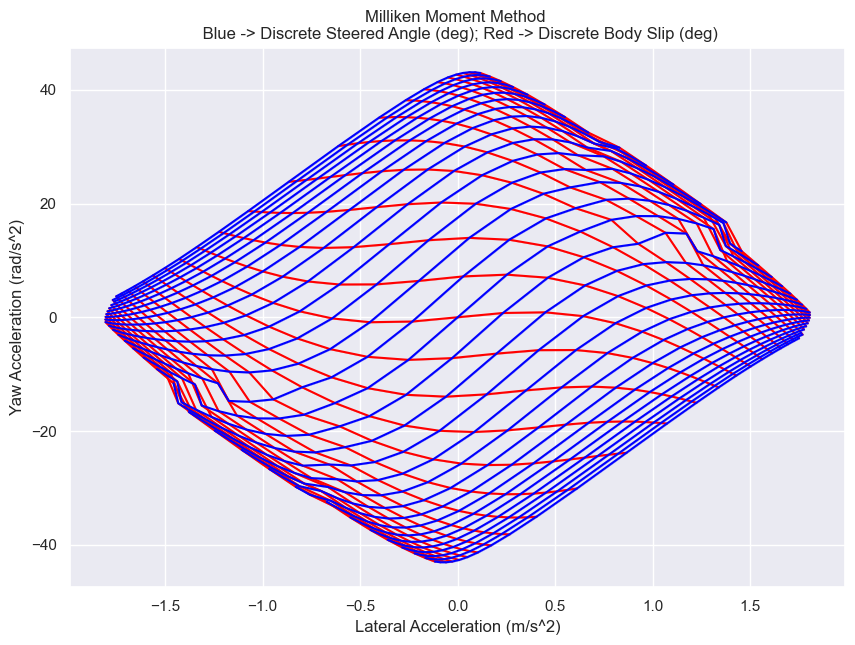

In [3]:
from cmath import pi


sns.set_theme(style = "darkgrid", palette = 'bright')
sns.set(rc = {'figure.figsize':(10,7)})
# fmri = sns.load_dataset("fmri")
# sns.lineplot(x="timepoint", y="signal",
#              hue="region", style="event",
#              data=fmri)
mmm_df = df[abs(df["torque_request"]-0) < 0.01 ]

for x in mmm_df["body_slip"].unique():
    df2 = mmm_df[mmm_df["body_slip"] == x]
    sns.lineplot(x = df2["vehicle_accelerations_NTB_1"] / 9.81, y = df2["yaw_acceleration"], 
                color = "red", label = round(x * 180 / np.pi), legend = False)

# labelLines(plt.gca().get_lines(), zorder = 2)

for x in mmm_df["steered_angle"].unique():
    df2 = mmm_df[(mmm_df["steered_angle"] == x)]
    sns.lineplot(x = df2["vehicle_accelerations_NTB_1"] / 9.81, y = df2["yaw_acceleration"], 
                color = "blue", label = round(x * 180 / np.pi), legend = False)

# labelLines(plt.gca().get_lines(), zorder = 1)

# vals_deg = [round(x * 180 / np.pi) for x in mmm_df["body_slip"].unique()]

# print(vals_deg)

# print(plt.gca().get_lines())

plt.title("Milliken Moment Method \n Blue -> Discrete Steered Angle (deg); Red -> Discrete Body Slip (deg)")
plt.ylabel("Yaw Acceleration (rad/s^2)")
plt.xlabel("Lateral Acceleration (m/s^2)")

Text(0.5, 0, 'Lateral Acceleration (m/s^2)')

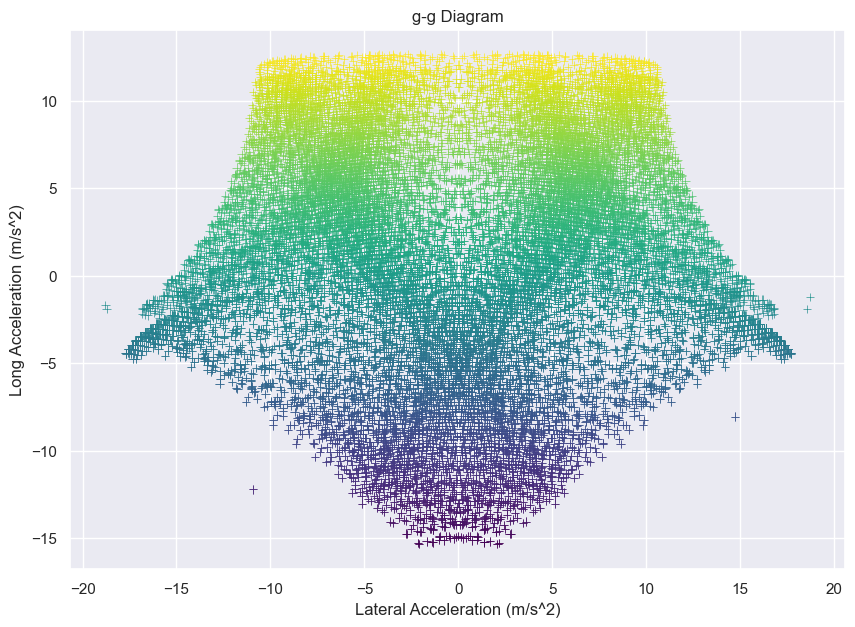

In [44]:
sns.set_theme(style="darkgrid")
sns.set(rc = {'figure.figsize':(10,7)})

sns.scatterplot(x = df["vehicle_accelerations_NTB_1"], y = df["vehicle_accelerations_NTB_0"], hue = df["vehicle_accelerations_NTB_0"], 
                palette = sns.color_palette("viridis", as_cmap = True),  legend = False, marker = "+")
# plt.legend(title='urmom', loc='upper right', labels=['x', 'y', 'z'])
plt.title("g-g Diagram")
plt.ylabel("Long Acceleration (m/s^2)")
plt.xlabel("Lateral Acceleration (m/s^2)")

Text(0.5, 0, 'Lateral Acceleration (m/s^2)')

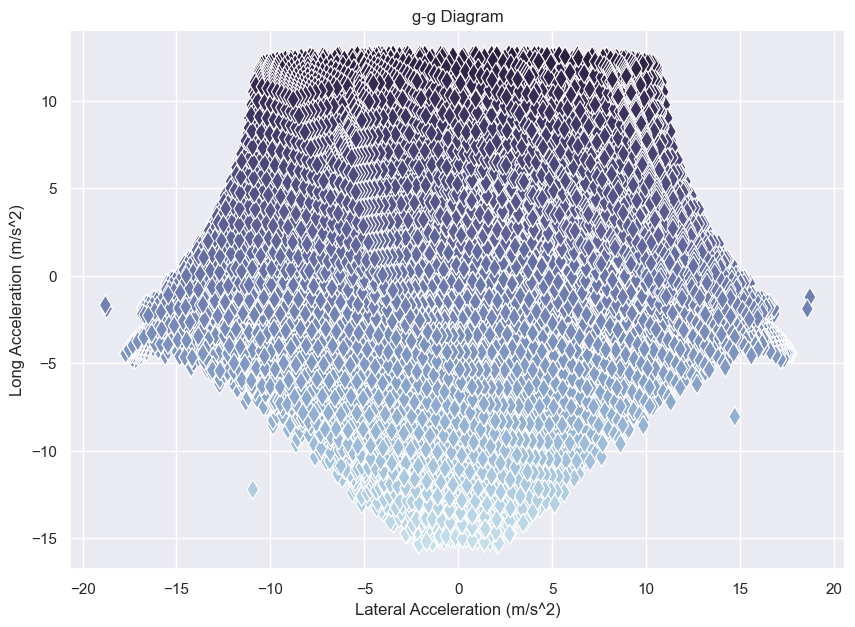

In [5]:
sns.set_theme(style = "darkgrid")
sns.scatterplot(x = df["vehicle_accelerations_NTB_1"], y = df["vehicle_accelerations_NTB_0"], hue = df["vehicle_accelerations_NTB_0"], 
                s = 100, palette = sns.cubehelix_palette(start = .25, rot = -.25, as_cmap = True), marker = "d", legend = False)
plt.title("g-g Diagram")
plt.ylabel("Long Acceleration (m/s^2)")
plt.xlabel("Lateral Acceleration (m/s^2)")

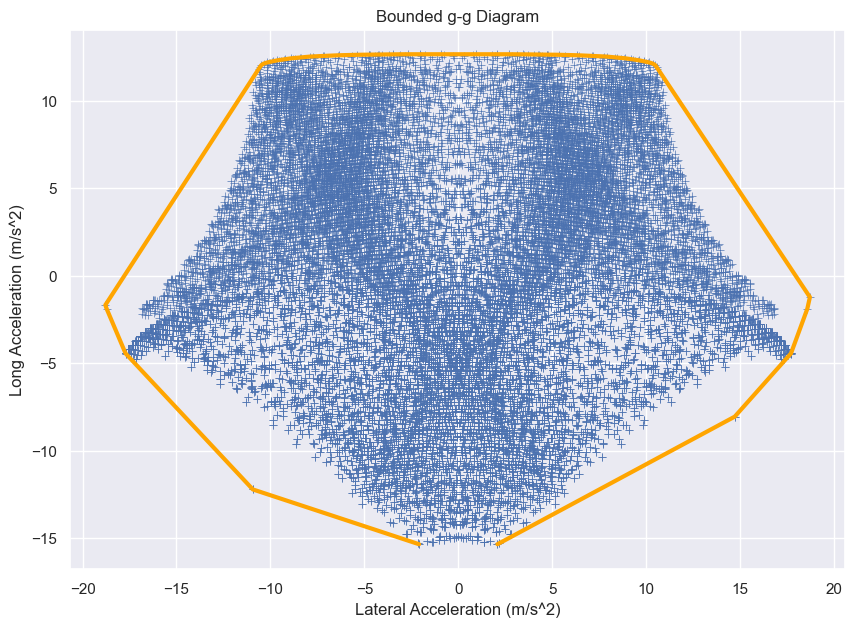

In [43]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
temp_df = df[abs(df["vehicle_accelerations_NTB_1"]) < 20]
points = temp_df[["vehicle_accelerations_NTB_1","vehicle_accelerations_NTB_0"]].to_numpy()
hull = ConvexHull(points)
dx = np.transpose(points)

sns.set_context("notebook", rc = {"lines.linewidth": 3})
sns.lineplot(x = points[hull.vertices,0], y = points[hull.vertices,1], sort = False, color = 'orange')
sns.scatterplot(x = dx[0], y = dx[1], marker = "+")

plt.title("Bounded g-g Diagram")
plt.ylabel("Long Acceleration (m/s^2)")
plt.xlabel("Lateral Acceleration (m/s^2)")

new_df = temp_df.iloc[hull.vertices]

Text(0.5, 1.0, 'Long Acceleration Boounds vs Torque Request')

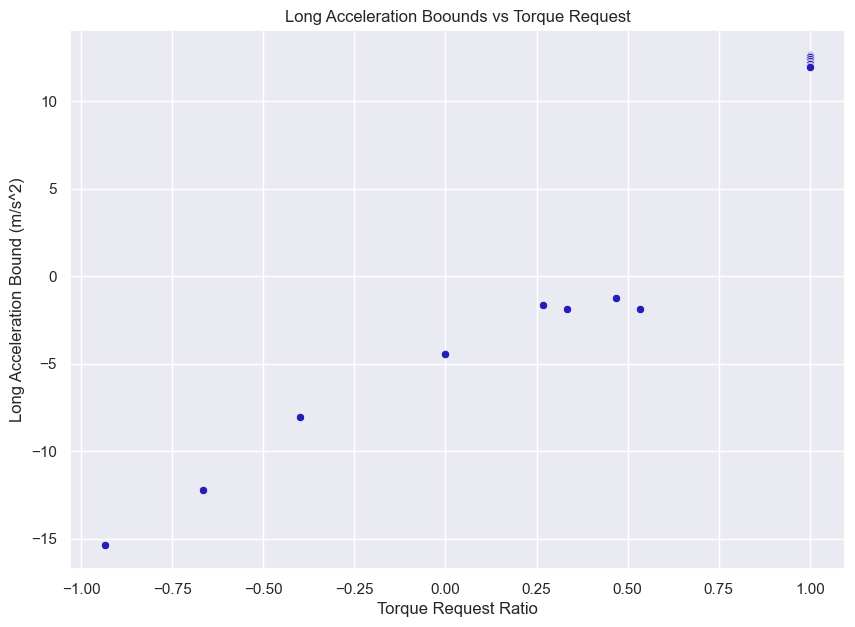

In [72]:
sns.scatterplot(x = new_df["torque_request"], y = new_df["vehicle_accelerations_NTB_0"], color = '#231FB3')

plt.ylabel("Long Acceleration Bound (m/s^2)")
plt.xlabel("Torque Request Ratio")
plt.title("Long Acceleration Boounds vs Torque Request")


Text(0.5, 0, 'Torque Request Ratio')

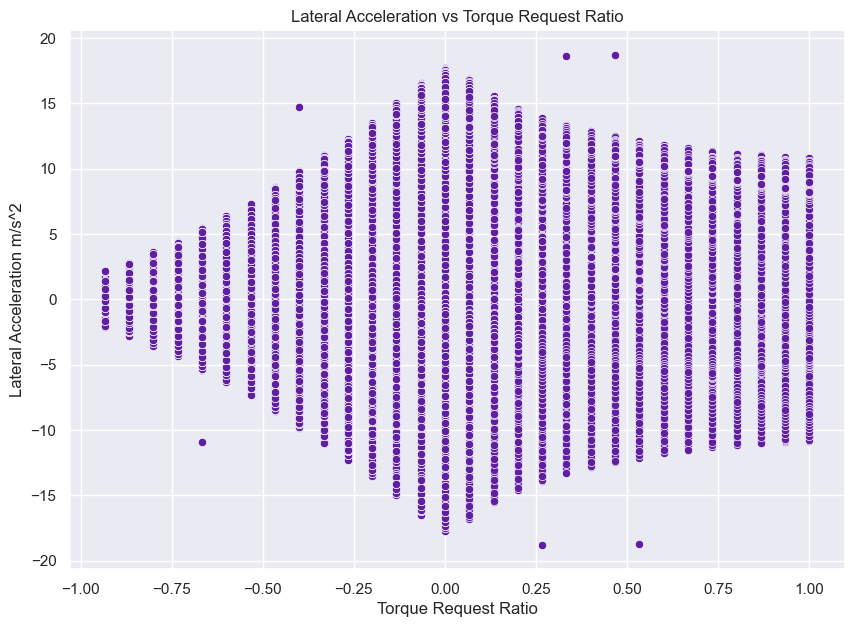

In [71]:
sns.scatterplot(x = df["torque_request"], y = df["vehicle_accelerations_NTB_1"], color = '#601FA3')
plt.title('Lateral Acceleration vs Torque Request Ratio')
plt.ylabel('Lateral Acceleration m/s^2')
plt.xlabel('Torque Request Ratio')

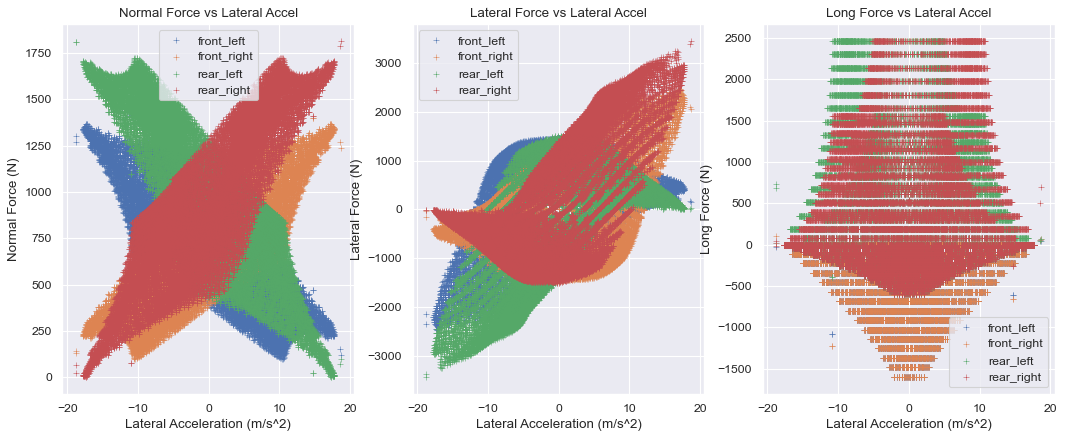

In [42]:
fig, axs = plt.subplots(1, 3, figsize = (16, 6), dpi = 80)

for tire in tires:
    sns.scatterplot(ax = axs[0], x = df["vehicle_accelerations_NTB_1"], y = df[f"{tire}_tire_tire_centric_forces_2"], 
                    label = tire, marker = "+")
axs[0].set_title("Normal Force vs Lateral Accel")
axs[0].set_ylabel("Normal Force (N)")
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].legend()

for tire in tires:
    sns.scatterplot(ax = axs[1], x = df["vehicle_accelerations_NTB_1"], y = df[f"{tire}_tire_tire_centric_forces_1"], 
                    label = tire, marker = "+")
axs[1].set_title("Lateral Force vs Lateral Accel")
axs[1].set_ylabel("Lateral Force (N)")
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].legend()

for tire in tires:
    sns.scatterplot(ax = axs[2], x = df["vehicle_accelerations_NTB_1"], y = df[f"{tire}_tire_tire_centric_forces_0"], 
                    label = tire, marker = "+")
axs[2].set_title("Long Force vs Lateral Accel")
axs[2].set_ylabel("Long Force (N)")
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")
axs[2].legend()

Text(0.5, 1.0, 'Heave vs Lateral Accel')

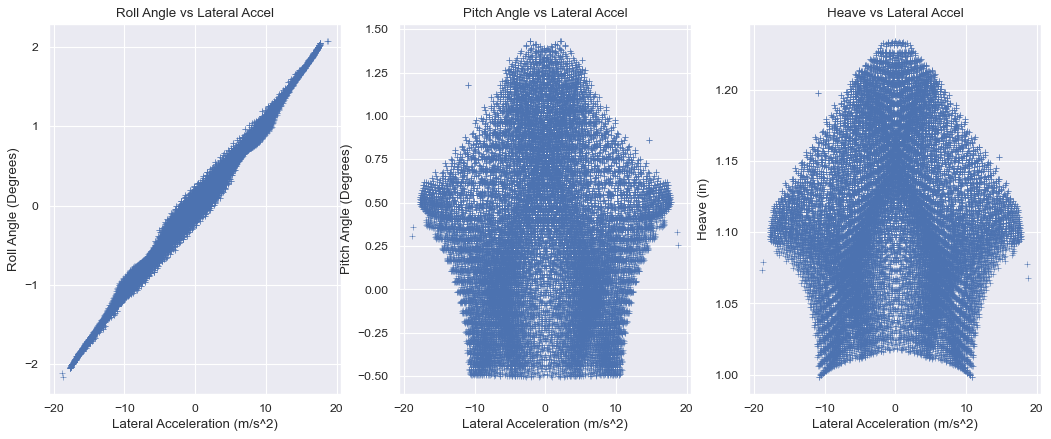

In [45]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)

sns.scatterplot(ax = axs[0], x = df['vehicle_accelerations_NTB_1'], y = df['roll'] * (180 / np.pi), marker = "+")
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].set_ylabel('Roll Angle (Degrees)')
axs[0].set_title("Roll Angle vs Lateral Accel")

sns.scatterplot(ax = axs[1], x = df['vehicle_accelerations_NTB_1'], y = df['pitch'] * (180 / np.pi), marker = "+")
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].set_ylabel('Pitch Angle (Degrees)')
axs[1].set_title("Pitch Angle vs Lateral Accel")

sns.scatterplot(ax = axs[2], x = df['vehicle_accelerations_NTB_1'], y = df['heave'] / .0254, marker = "+")
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")
axs[2].set_ylabel('Heave (in)')
axs[2].set_title("Heave vs Lateral Accel")

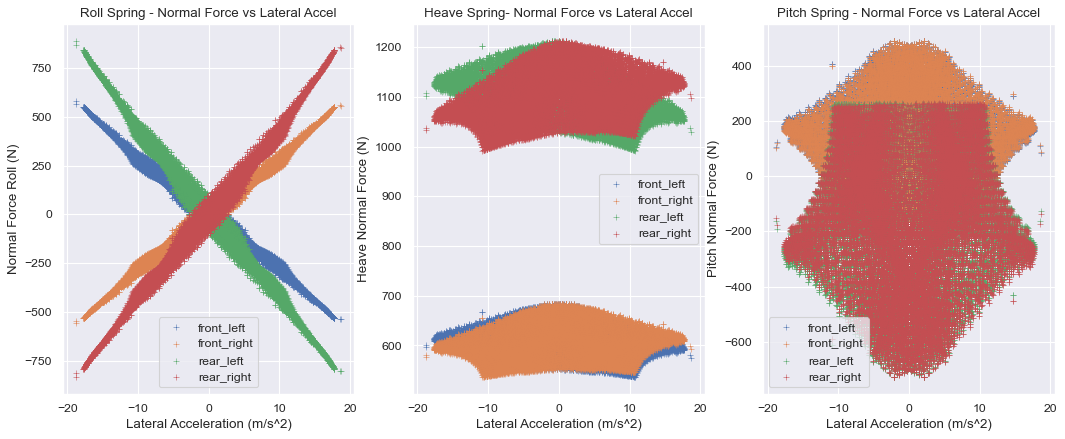

In [41]:
fig, axs = plt.subplots(1,3,figsize=(16, 6), dpi=80)

for tire in tires:
    sns.scatterplot(ax = axs[0], x = df["vehicle_accelerations_NTB_1"], y = df[f"{tire}_tire_f_roll"], 
                    label = tire, marker = "+")
axs[0].set_title("Roll Spring - Normal Force vs Lateral Accel")
axs[0].set_ylabel("Normal Force Roll (N)")
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].legend()

for tire in tires:
    sns.scatterplot(ax = axs[1], x = df["vehicle_accelerations_NTB_1"], y = df[f"{tire}_tire_f_heave"], 
                    label = tire, marker = "+")
axs[1].set_title("Heave Spring- Normal Force vs Lateral Accel")
axs[1].set_ylabel("Heave Normal Force (N)")
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].legend()

for tire in tires:
    sns.scatterplot(ax = axs[2], x = df["vehicle_accelerations_NTB_1"], y = df[f"{tire}_tire_f_pitch"], 
                    label = tire, marker = "+")
axs[2].set_title("Pitch Spring - Normal Force vs Lateral Accel")
axs[2].set_ylabel("Pitch Normal Force (N)")
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")
axs[2].legend()

Text(0.5, 1.0, 'Tire Slip Ratio vs Lateral Accel')

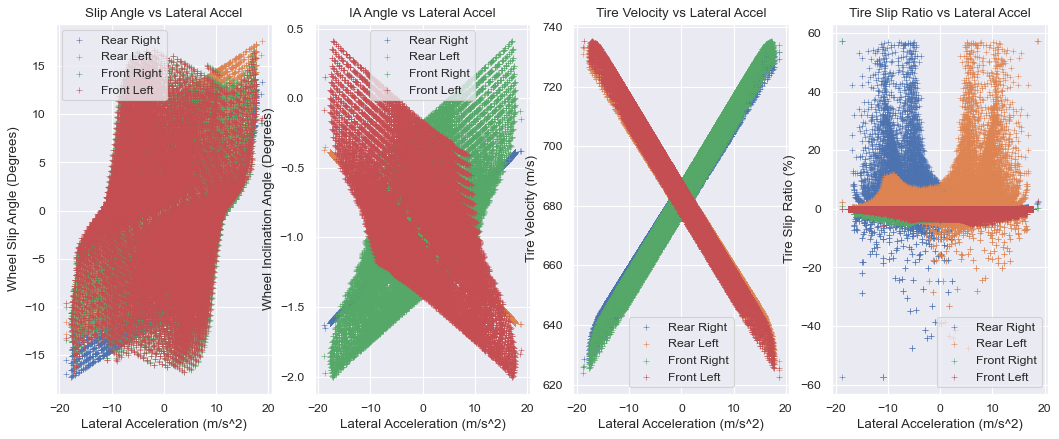

In [55]:
fig, axs = plt.subplots(1,4,figsize=(16, 6), dpi=80)

sns.scatterplot(ax = axs[0], x = df['vehicle_accelerations_NTB_1'], y = df['rear_right_tire_slip_angle'] * (180 / np.pi), 
                label = 'Rear Right', marker = "+")
sns.scatterplot(ax = axs[0], x = df['vehicle_accelerations_NTB_1'], y = df['rear_left_tire_slip_angle'] * (180 / np.pi), 
                label = 'Rear Left', marker = "+")
sns.scatterplot(ax = axs[0], x = df['vehicle_accelerations_NTB_1'], y = df['front_right_tire_slip_angle'] * (180 / np.pi), 
                label = 'Front Right', marker = "+")
sns.scatterplot(ax = axs[0], x = df['vehicle_accelerations_NTB_1'], y = df['front_left_tire_slip_angle'] * (180 / np.pi), 
                label = 'Front Left', marker = "+")
axs[0].legend()
axs[0].set_xlabel("Lateral Acceleration (m/s^2)")
axs[0].set_ylabel('Wheel Slip Angle (Degrees)')
axs[0].set_title("Slip Angle vs Lateral Accel")

sns.scatterplot(ax = axs[1], x = df['vehicle_accelerations_NTB_1'], y = df['rear_right_tire_inclination_angle'] * (180 / np.pi), 
                label = 'Rear Right', marker = "+")
sns.scatterplot(ax = axs[1], x = df['vehicle_accelerations_NTB_1'], y = df['rear_left_tire_inclination_angle'] * (180 / np.pi),
                label = 'Rear Left', marker = "+")
sns.scatterplot(ax = axs[1], x = df['vehicle_accelerations_NTB_1'], y = df['front_right_tire_inclination_angle'] * (180 / np.pi), 
                label = 'Front Right', marker = "+")
sns.scatterplot(ax = axs[1], x = df['vehicle_accelerations_NTB_1'], y = df['front_left_tire_inclination_angle'] * (180 / np.pi), 
                label = 'Front Left', marker = "+")
axs[1].legend()
axs[1].set_xlabel("Lateral Acceleration (m/s^2)")
axs[1].set_ylabel('Wheel Inclination Angle (Degrees)')
axs[1].set_title("IA Angle vs Lateral Accel")

sns.scatterplot(ax = axs[2], x = df['vehicle_accelerations_NTB_1'], y = df['rear_right_tire_velocity_0'] * (180 / np.pi), 
                label = 'Rear Right', marker = "+")
sns.scatterplot(ax = axs[2], x = df['vehicle_accelerations_NTB_1'], y = df['rear_left_tire_velocity_0'] * (180 / np.pi), 
                label = 'Rear Left', marker = "+")
sns.scatterplot(ax = axs[2], x = df['vehicle_accelerations_NTB_1'], y = df['front_right_tire_velocity_0'] * (180 / np.pi), 
                label = 'Front Right', marker = "+")
sns.scatterplot(ax = axs[2], x = df['vehicle_accelerations_NTB_1'], y = df['front_left_tire_velocity_0'] * (180 / np.pi), 
                label = 'Front Left', marker = "+")
axs[2].legend()
axs[2].set_xlabel("Lateral Acceleration (m/s^2)")
axs[2].set_ylabel('Tire Velocity (m/s)')
axs[2].set_title("Tire Velocity vs Lateral Accel")

sns.scatterplot(ax = axs[3], x = df['vehicle_accelerations_NTB_1'], y = df['rear_right_tire_slip_ratio'] * (180 / np.pi), 
                label = 'Rear Right', marker = "+")
sns.scatterplot(ax = axs[3], x = df['vehicle_accelerations_NTB_1'], y = df['rear_left_tire_slip_ratio'] * (180 / np.pi), 
                label = 'Rear Left', marker = "+")
sns.scatterplot(ax = axs[3], x = df['vehicle_accelerations_NTB_1'], y = df['front_right_tire_slip_ratio'] * (180 / np.pi), 
                label = 'Front Right', marker = "+")
sns.scatterplot(ax = axs[3], x = df['vehicle_accelerations_NTB_1'], y = df['front_left_tire_slip_ratio'] * (180 / np.pi), 
                label = 'Front Left', marker = "+")
axs[3].legend()
axs[3].set_xlabel("Lateral Acceleration (m/s^2)")
axs[3].set_ylabel('Tire Slip Ratio (%)')
axs[3].set_title("Tire Slip Ratio vs Lateral Accel")

Text(0.5, 0, 'Lateral Acceleration (m/s^2)')

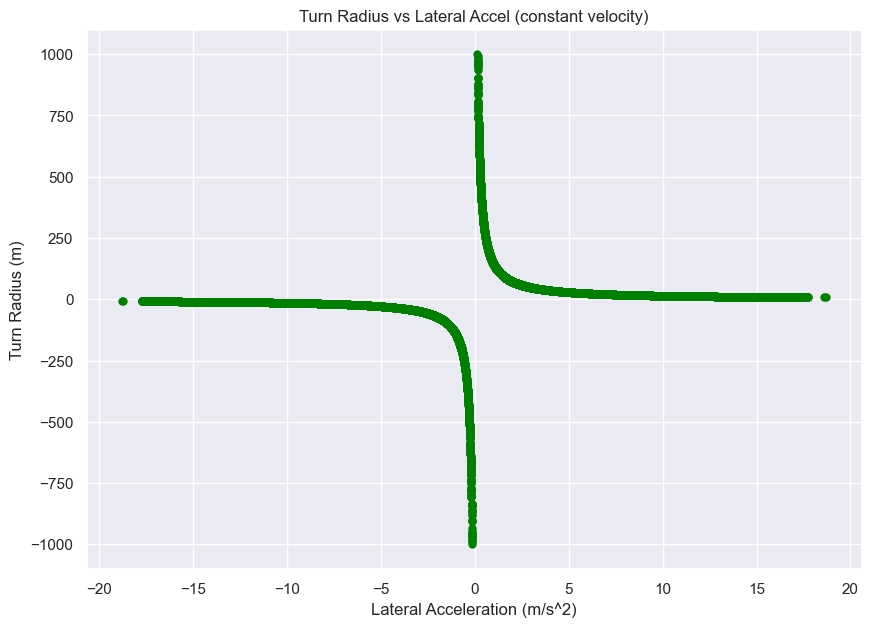

In [70]:
temp_df = df[abs(df["vehicle_turn_radius"]) < 1000]
sns.scatterplot(x = temp_df["vehicle_accelerations_NTB_1"], y = temp_df["vehicle_turn_radius"], linewidth = 0, color = 'green')
plt.title("Turn Radius vs Lateral Accel (constant velocity)")
plt.ylabel('Turn Radius (m)')
plt.xlabel('Lateral Acceleration (m/s^2)')

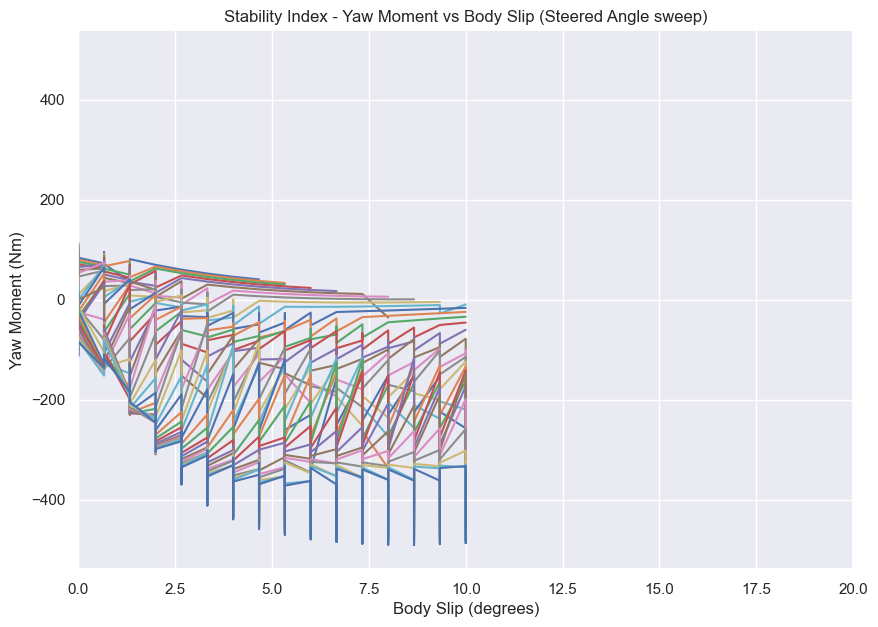

In [75]:
for x in df["steered_angle"].unique():
    if True:#x == 0:
        df2 = df[(df["steered_angle"] == x)]
        plt.plot(df2["body_slip"] * 180 / math.pi, df2["vehicle_yaw_moment"] / 9.81)
plt.xlim([0, 20])
plt.title("Stability Index - Yaw Moment vs Body Slip (Steered Angle sweep)")
plt.ylabel("Yaw Moment (Nm)")
plt.xlabel("Body Slip (degrees)")
plt.show()

In [94]:
%cd ..
import engine
import vehicle_params
%cd analysis/
vehicle = engine.Vehicle(vehicle_params.EasyDriver())
slip_angles = np.linspace(-30, 30, 1000)
s = vehicle.suspension
for normal_force in np.linspace(10, 2000, 10):
    output_force = [vehicle.suspension._Suspension__tires.front_right.lateral_pacejka(0, normal_force, y/180*np.pi) for y in slip_angles]
    plt.plot(slip_angles, output_force)
plt.title("Front Tire - Lateral Fit")

c:\Users\Kylie\OneDrive\Documents\Github\magic_moment_method


ModuleNotFoundError: No module named 'engine'

In [76]:
slip_angles = np.linspace(-30, 30, 1000)
for normal_force in np.linspace(10, 2000, 10):
    output_force = [vehicle.suspension._Suspension__tires.rear_right.lateral_pacejka(0, normal_force, y/180*np.pi) for y in slip_angles]
    plt.plot(slip_angles, output_force)

NameError: name 'vehicle' is not defined

Text(0.5, 1.0, 'Tire Compression vs Lateral Acceleration')

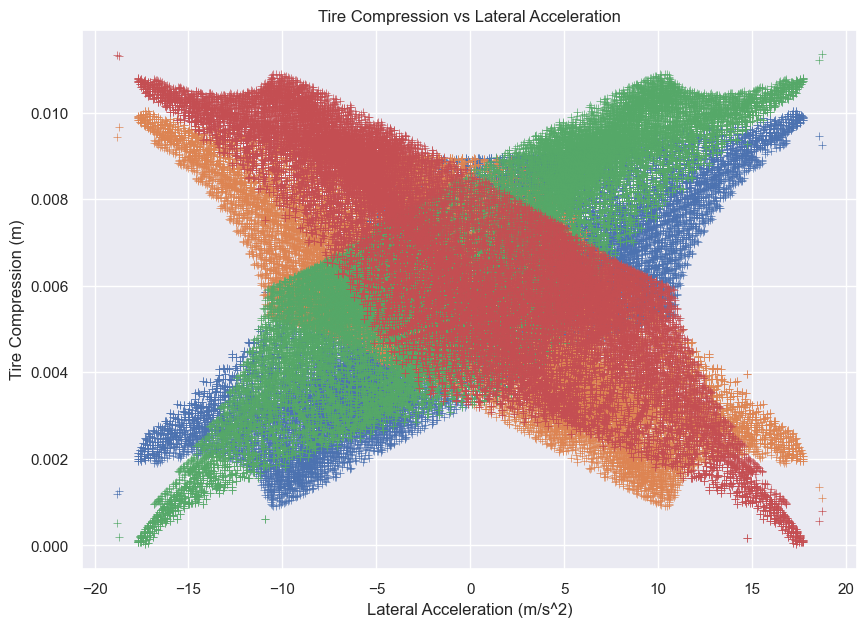

In [83]:
sns.scatterplot(x = df["vehicle_accelerations_NTB_1"], y = df["front_right_tire_disp"], marker = "+")
sns.scatterplot(x = df["vehicle_accelerations_NTB_1"], y = df["front_left_tire_disp"], marker = "+")
sns.scatterplot(x = df["vehicle_accelerations_NTB_1"], y = df["rear_right_tire_disp"], marker = "+")
sns.scatterplot(x = df["vehicle_accelerations_NTB_1"], y = df["rear_left_tire_disp"], marker = "+")

plt.xlabel('Lateral Acceleration (m/s^2)')
plt.ylabel('Tire Compression (m)')
plt.title('Tire Compression vs Lateral Acceleration')

Text(0.5, 0, 'Lateral Acceleration (m/s^2)')

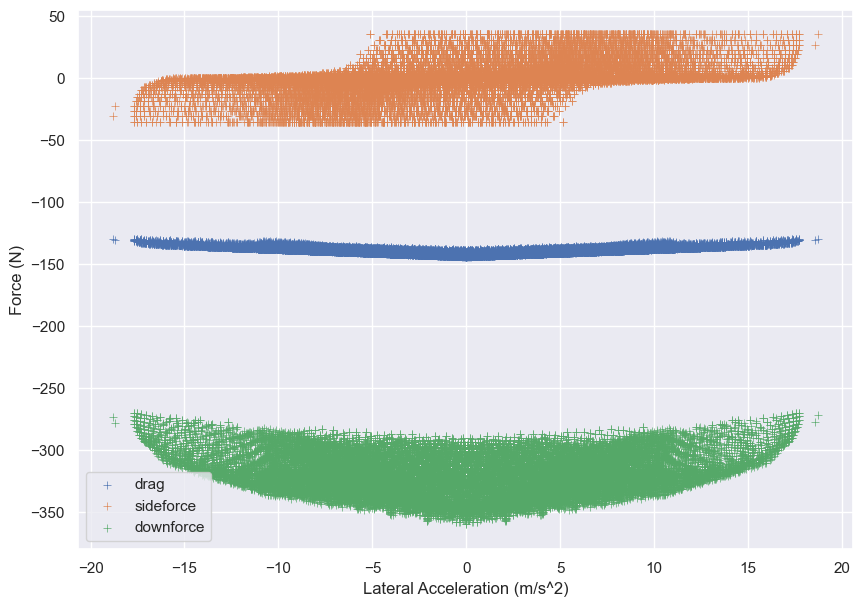

In [86]:
sns.scatterplot(x = df["vehicle_accelerations_NTB_1"], y = df["aero_forces_0"], label = "drag", marker = "+")
sns.scatterplot(x = df["vehicle_accelerations_NTB_1"], y = df["aero_forces_1"], label = "sideforce", marker = "+")
sns.scatterplot(x = df["vehicle_accelerations_NTB_1"], y = df["aero_forces_2"], label = "downforce", marker = "+")

plt.legend()
plt.ylabel("Force (N)")
plt.xlabel("Lateral Acceleration (m/s^2)")

Text(0.5, 1.0, 'Side Force vs Body Slip')

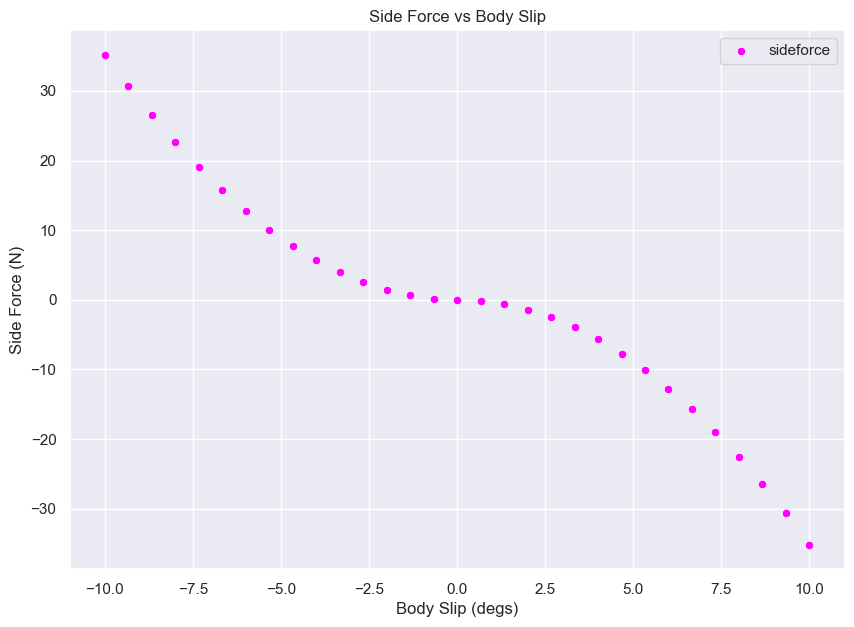

In [93]:
sns.scatterplot(x = df["body_slip"] * 180 / np.pi, y = df["aero_forces_1"], label = "sideforce", color = "magenta")

plt.ylabel("Side Force (N)")
plt.xlabel("Body Slip (degs)")
plt.title('Side Force vs Body Slip')